# Purpose:

Benchmark how coverage will be distributed across cells and how coverage will affect our ability to HMM impute and cluster individuals.

In [1]:
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = np.load('/home/iskander/Documents/Barbash_lab/mDrive/SIM_DATA/SPARSE_test.concat.npy', allow_pickle=True)

In [3]:
all_snp_cov = []
for cell in test:
    snp_coverage = 0
    for chrom in cell:
        covs = len(chrom[:,1]) - len(chrom[:,1][np.isnan(chrom[:,1] )])
        snp_coverage += covs
    all_snp_cov.append(snp_coverage)
all_snp_cov = np.asarray(all_snp_cov)

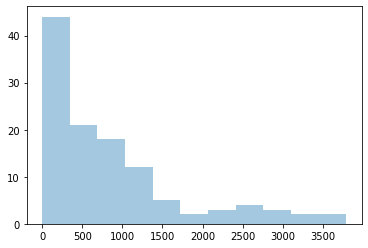

In [4]:
sns.distplot(all_snp_cov, kde=False)
plt.show()
plt.close()

From this sampling of 100 or so individuals where the average reads was 3,000 under a geometric distribution we can see that the number of actual SNPs is a bit lower than what I had originally anticipated. I think I may have over estimated slightly how many SNPs I would get, but perhaps this is just due to the fact that I am sampling a very small number of individuals.  

In [20]:
np.average(all_snp_cov)

857.5258620689655

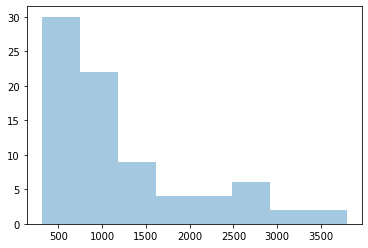

1196.367088607595

In [24]:
filtered_data = all_snp_cov[np.where(all_snp_cov >= 300)]

sns.distplot(filtered_data, kde=False)
plt.show()
plt.close()
np.average(filtered_data)

Kind of awesomely after filtering for cells that had more than 300 SNPs I almost perfectly predicted the average SNP density. This could be a fluke or maybe I'm a genius. ;)

In [25]:
len(filtered_data) / len(all_snp_cov)

0.6810344827586207

And it looks like the cells that had less than 300 SNPs account for roughly 30% of the data in these simulations. In reality I'm expecting a drop out rate of 50% given the data that Roman showed me. But this is honestly just dependent on how stringent I want to be in my cutoffs. 

In [7]:
reads = np.random.geometric(p=1/3000, size=6000)

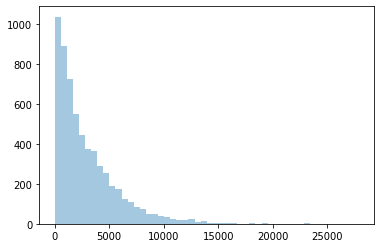

In [8]:
sns.distplot(reads, kde=False)
plt.show()
plt.close()

In [9]:
np.sum(reads)/1000000

17.462238

We expect 150M unique reads from a 300M read flow cell. Our task is to calculate what proportion of a lane could I give a given library and still maintain good data. 

In [10]:
tot_reads = 0
for i in range(4):
    reads = np.random.geometric(p=1/3000, size=6000)
    tot_reads += np.sum(reads)/1000000

In [11]:
tot_reads

71.83725199999999

# Filtering low coverage cells:

I simulated ~6000 from a cross and sub sampled reads based on a geometric distribution as I've been doing before.

In [56]:
simdata = np.load('/home/iskander/Documents/Barbash_lab/mDrive/SIM_DATA/SPARSE_sim_9-26-19.concat.npy', allow_pickle=True)

In [57]:
cov = []
for cell in simdata:
    cell_cov = 0
    for arm in cell:
        cell_cov += np.sum(np.isnan(arm[:,1]) == False)
    cov.append(cell_cov)
cov = np.asarray(cov)

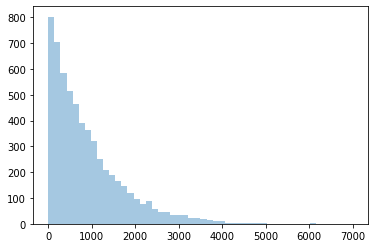

In [58]:
sns.distplot(cov, kde=False)
plt.show()
plt.close()

So now we can see the distribution of the SNPs that were sampled from our large data set. It predictably is still geometric.

In [59]:
np.average(cov)

894.4627450980392

Before cut off we have an average SNPs of 900 per cell which is about 1 SNP for every 3.3 reads on average. Which I think is not too bad. Now the question is how do we filter our cells? I had before just said 300 SNPs as bad, but that may not be true. I may be able to push the data a bit further, but I don't know. This is going to be an important parameter to play with in the future.

In [60]:
filtered = cov[np.where(cov >= 300)]

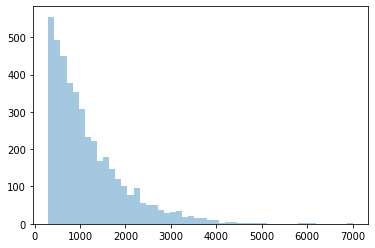

In [61]:
sns.distplot(filtered, kde=False)
plt.show()
plt.close()

In [62]:
len(filtered) / len(cov)

0.7304347826086957

Filtering cells by less than 300 SNPs shows a yield of 73% of cells which is reminiscent of our previous estimates. I still think the drop out rate will be higher than this, but whatever.

In [63]:
cov_matrix = np.full(fill_value=np.nan, shape=(3, len(simdata)))
c_index = 0
for cell in simdata:
    a_index = 0
    for arm in cell:
        cov_matrix[a_index][c_index] = np.sum(np.isnan(arm[:,1]) == False)
        a_index += 1
    c_index += 1


I'd like to filter out cells now that have less than 100 SNPs sampled from each chromosome and see how that effects my filtering.

In [64]:
filtered_2 = np.intersect1d(np.where(cov_matrix[0,:] >= 100), np.where(cov_matrix[1,:] >= 100), np.where(cov_matrix[2,:] >= 100))

In [65]:
d = np.sum(cov_matrix, axis=0)[filtered_2]

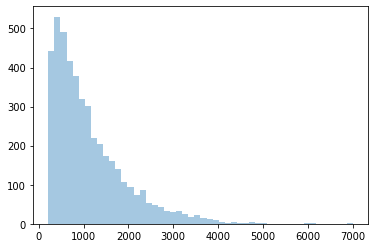

In [66]:
sns.distplot(d, kde=False)
plt.show()
plt.close()

In [67]:
np.average(d)
len(d) / len(cov)

0.7684569479965899